In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sample dataset

In [3]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(100)

In [4]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [6]:
from sklearn.svm import SVR

# Initialize SVR models with different kernels
svr_linear = SVR(kernel='linear', C=1.0)
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
svr_rbf = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)

In [7]:
# Train the models
svr_linear.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

SVR()

In [8]:
# Predictions
y_pred_linear = svr_linear.predict(X_test)
y_pred_poly = svr_poly.predict(X_test)
y_pred_rbf = svr_rbf.predict(X_test)

### Model Evaluation 

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation function
def evaluate_model(y_true, y_pred, kernel_type):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{kernel_type} Kernel:")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"R-squared: {r2:.3f}\n")

In [11]:
# Evaluate each model
evaluate_model(y_test, y_pred_linear, "Linear")
evaluate_model(y_test, y_pred_poly, "Polynomial")
evaluate_model(y_test, y_pred_rbf, "RBF")

Linear Kernel:
Mean Squared Error: 0.248
R-squared: 0.493

Polynomial Kernel:
Mean Squared Error: 0.140
R-squared: 0.713

RBF Kernel:
Mean Squared Error: 0.027
R-squared: 0.946



### Plotting results

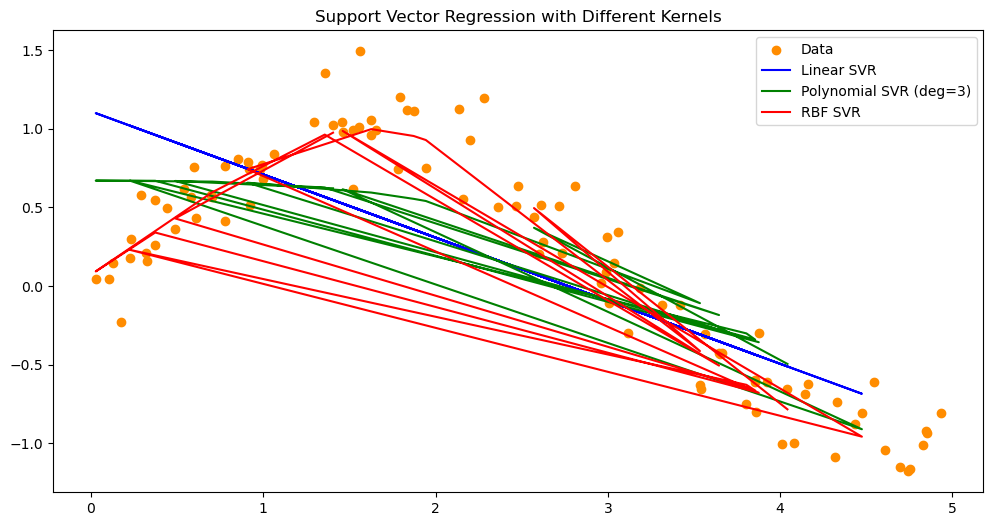

In [13]:
plt.figure(figsize=(12, 6))

# Scatter plot of the true data
plt.scatter(X, y, color='darkorange', label='Data')

# SVR predictions
plt.plot(X_test, y_pred_linear, color='blue', label='Linear SVR')
plt.plot(X_test, y_pred_poly, color='green', label='Polynomial SVR (deg=3)')
plt.plot(X_test, y_pred_rbf, color='red', label='RBF SVR')

plt.title('Support Vector Regression with Different Kernels')
plt.legend()
plt.show()

### GridSearch

In [15]:
# Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'degree': [2, 3, 4],  # for polynomial kernel
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [16]:
from sklearn.model_selection import GridSearchCV

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

### Training the Tuned Model

In [18]:
# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}


In [19]:
# Best estimator
best_svr = grid_search.best_estimator_

# Predictions using the best model
y_pred = best_svr.predict(X_test)

### Evaluvating Tuned Model

In [21]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

Mean Squared Error: 0.028
R-squared: 0.944


### Ploating Result

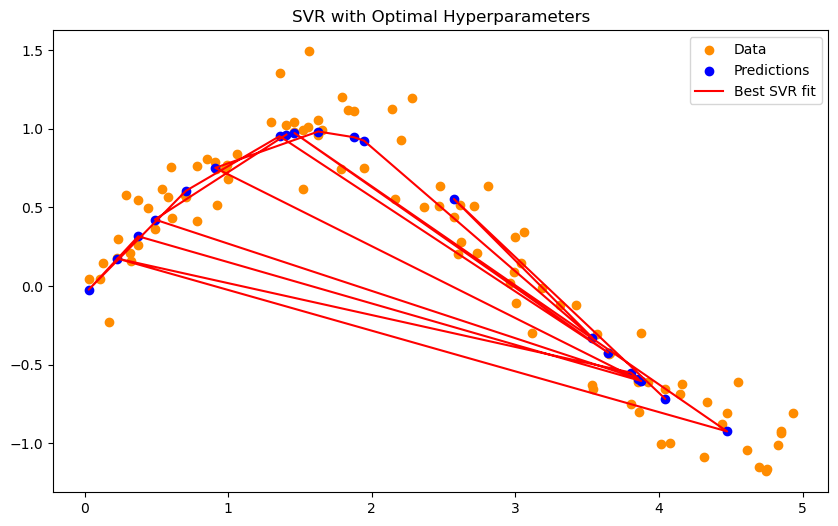

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='Data')
plt.scatter(X_test, y_pred, color='blue', label='Predictions')
plt.plot(X_test, y_pred, color='red', label='Best SVR fit')
plt.title('SVR with Optimal Hyperparameters')
plt.legend()
plt.show()